# GARCH Stock Forecasting

## Read Data

In [4]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

## DIS Volatility

In [5]:
start = datetime(2015, 1, 1)
end = datetime(2020, 6, 10)

In [6]:
dis = web.DataReader('DIS', 'yahoo', start=start, end=end)

In [7]:
returns = 100 * dis.Close.pct_change().dropna()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'DIS Returns')

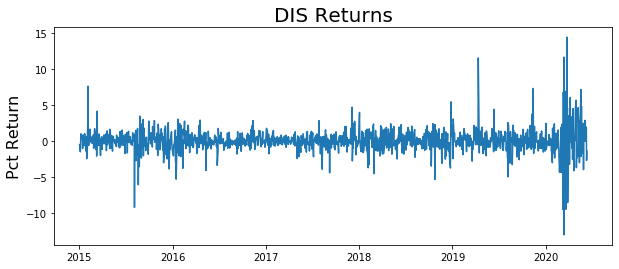

In [8]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

## PACF

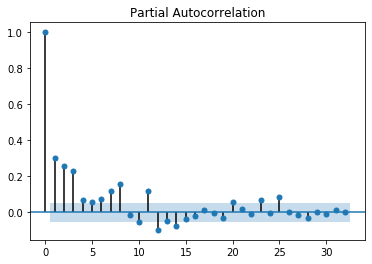

In [9]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(3,3)

In [10]:
model = arch_model(returns, p=3, q=3)

In [11]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 2326.20673855985
Iteration:      2,   Func. Count:     23,   Neg. LLF: 2325.6872215224325
Iteration:      3,   Func. Count:     35,   Neg. LLF: 2322.2840818072527
Iteration:      4,   Func. Count:     46,   Neg. LLF: 2315.4894894456434
Iteration:      5,   Func. Count:     57,   Neg. LLF: 2311.601612985214
Iteration:      6,   Func. Count:     68,   Neg. LLF: 2305.3226812613248
Iteration:      7,   Func. Count:     79,   Neg. LLF: 2304.1079445191244
Iteration:      8,   Func. Count:     90,   Neg. LLF: 2303.2409823342787
Iteration:      9,   Func. Count:    101,   Neg. LLF: 2302.2545402122787
Iteration:     10,   Func. Count:    111,   Neg. LLF: 2300.1566165862146
Iteration:     11,   Func. Count:    122,   Neg. LLF: 2300.073841423724
Iteration:     12,   Func. Count:    132,   Neg. LLF: 2300.039377185291
Iteration:     13,   Func. Count:    142,   Neg. LLF: 2300.0283550793815
Iteration:     14,   Func. Count:    152,   Neg. LLF: 23

In [12]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -2300.01
Distribution:                  Normal   AIC:                           4616.02
Method:            Maximum Likelihood   BIC:                           4657.80
                                        No. Observations:                 1369
Date:                Fri, Sep 18 2020   Df Residuals:                     1361
Time:                        20:41:49   Df Model:                            8
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -7.2793e-03  4.324e-02     -0.168      0.866 [-9.202e-02,7.746e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5400      0.189      2.856  4.291e-03    [  0.169,  0.911]
alpha[1]       0.0681  3.930e-02      1.732  8.330e-02 [-8.964e-03,  0.145]
alpha[2]       0.2033  9.898e-02      2.054  3.995e-02  [9.334e-03,  0.397]
alpha[3]       0.3173      0.151      2.097  3.597e-02  [2.077e-02,  0.614]
beta[1]        0.0000      0.164      0.000      1.000    [ -0.321,  0.321]
beta[2]    6.1043e-15  9.645e-02  6.329e-14      1.000    [ -0.189,  0.189]
beta[3]        0.2308      0.169      1.363      0.173    [ -0.101,  0.563]
===========================================================================

Covariance estimator: robust
"""

## Try GARCH(3,0) = ARCH(3)

In [13]:
model = arch_model(returns, p=3, q=0)

In [14]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2374.7703536284957
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2372.5523706376703
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2369.4462920377405
Iteration:      4,   Func. Count:     34,   Neg. LLF: 2349.7609246657585
Iteration:      5,   Func. Count:     42,   Neg. LLF: 2334.3612998867734
Iteration:      6,   Func. Count:     50,   Neg. LLF: 2330.71340469688
Iteration:      7,   Func. Count:     58,   Neg. LLF: 2322.3002432010207
Iteration:      8,   Func. Count:     67,   Neg. LLF: 2320.61691464238
Iteration:      9,   Func. Count:     74,   Neg. LLF: 2315.966344466747
Iteration:     10,   Func. Count:     81,   Neg. LLF: 2315.357755269952
Iteration:     11,   Func. Count:     88,   Neg. LLF: 2315.324389519891
Iteration:     12,   Func. Count:     95,   Neg. LLF: 2315.2592431491144
Iteration:     13,   Func. Count:    102,   Neg. LLF: 2315.258333705781
Iteration:     14,   Func. Count:    109,   Neg. LLF: 2315.

In [15]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                       ARCH   Log-Likelihood:               -2315.26
Distribution:                  Normal   AIC:                           4640.52
Method:            Maximum Likelihood   BIC:                           4666.63
                                        No. Observations:                 1369
Date:                Fri, Sep 18 2020   Df Residuals:                     1364
Time:                        20:41:49   Df Model:                            5
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.5845e-03  3.985e-02      0.241      0.810 [-6.852e-02,8.769e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.8614      0.138      6.237  4.449e-10    [  0.591,  1.132]
alpha[1]       0.0882  4.510e-02      1.956  5.045e-02 [-1.740e-04,  0.177]
alpha[2]       0.2627  9.127e-02      2.878  4.003e-03  [8.378e-02,  0.442]
alpha[3]       0.3556      0.169      2.103  3.550e-02  [2.412e-02,  0.687]
===========================================================================

Covariance estimator: robust
"""

In [16]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [17]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

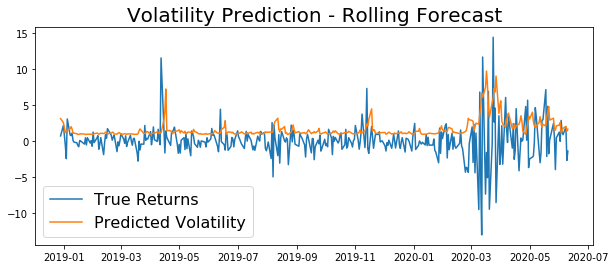

In [18]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

In [19]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

In [20]:
spy = web.DataReader('SPY', 'yahoo', start=start, end=end)

In [21]:
returns = 100 * spy.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

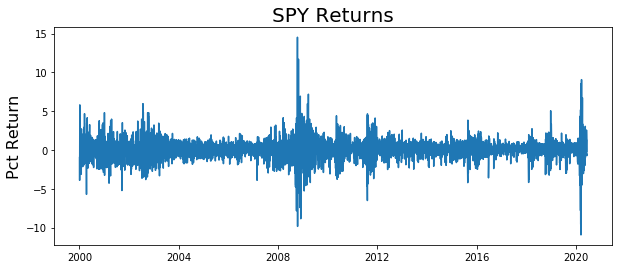

In [22]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

## PACF

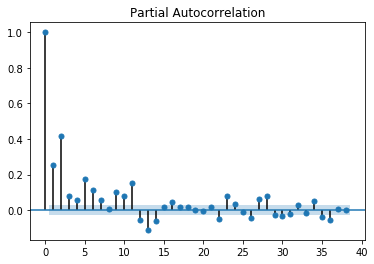

In [23]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,2)

In [24]:
model = arch_model(returns, p=2, q=2)

In [25]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 7066.008594024501
Iteration:      2,   Func. Count:     21,   Neg. LLF: 7062.468132526621
Iteration:      3,   Func. Count:     33,   Neg. LLF: 7062.426587826758
Iteration:      4,   Func. Count:     43,   Neg. LLF: 7061.89051904671
Iteration:      5,   Func. Count:     53,   Neg. LLF: 7056.903611876892
Iteration:      6,   Func. Count:     62,   Neg. LLF: 7056.492295963608
Iteration:      7,   Func. Count:     71,   Neg. LLF: 7055.999476025278
Iteration:      8,   Func. Count:     80,   Neg. LLF: 7055.821354328642
Iteration:      9,   Func. Count:     89,   Neg. LLF: 7055.799741449094
Iteration:     10,   Func. Count:     98,   Neg. LLF: 7055.692906618113
Iteration:     11,   Func. Count:    106,   Neg. LLF: 7055.683636963675
Iteration:     12,   Func. Count:    114,   Neg. LLF: 7055.683621970915
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 7055.683621971911
            Iterations: 12
 

In [26]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -7055.68
Distribution:                  Normal   AIC:                           14123.4
Method:            Maximum Likelihood   BIC:                           14162.6
                                        No. Observations:                 5142
Date:                Fri, Sep 18 2020   Df Residuals:                     5136
Time:                        20:42:03   Df Model:                            6
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0663  1.096e-02      6.051  1.437e-09 [4.484e-02,8.780e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0403  9.924e-03      4.063  4.838e-05 [2.087e-02,5.978e-02]
alpha[1]       0.0805  2.192e-02      3.672  2.403e-04   [3.754e-02,  0.123]
alpha[2]       0.1319  3.102e-02      4.253  2.107e-05   [7.113e-02,  0.193]
beta[1]        0.3103      0.296      1.047      0.295     [ -0.271,  0.891]
beta[2]        0.4483      0.261      1.718  8.574e-02  [-6.305e-02,  0.960]
============================================================================

Covariance estimator: robust
"""

## Rolling Forecast

In [27]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [28]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

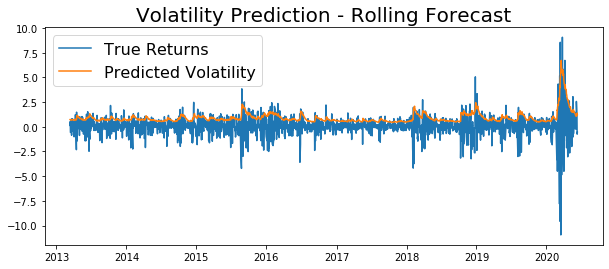

In [29]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [30]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [31]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

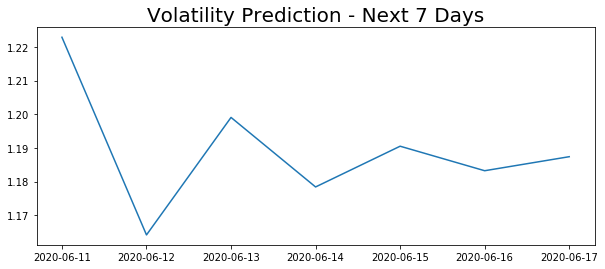

In [32]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)